#**Back Propagation**

#Step 1 : import libraries

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#Step 2 :Load the Dataset
###Upload palmer penguins dataset " / LAB/ Dataset/ penguins.csv





In [62]:
# Load dataset
data = pd.read_csv('/content/penguins-2.csv')


# Drop target column and convert to float
X = data.drop('species', axis=1)
y = data['species']

X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividing the dataset into target variable and features
print(data.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


#Step 3: Split Dataset in Training and Testing


In [63]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(275, 6) (69, 6) (275,) (69,)


# Step 4 : initializing the hyperparameters

In [81]:
# Input features
input_size = X_train.shape[1]
# Hidden layers
hidden_size = 20
# Output layer
output_size = len(np.unique(y))
learning_rate = 0.001
iterations =  9000


#Step 5 : Initialize Weights

In [82]:
def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)


#Step 6 : mean squared error, accuracy and sigmoid.



In [83]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def sigmoid_derivative(z):
    return z * (1 - z)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def one_hot_encode(y):
    return pd.get_dummies(y).values

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


#Step 7 : Building the Backpropogation Model in Python
###We will create a for loop for a given number of iterations and will update the weights in each iteration. The model will go through three phases feedforward propagation, the error calculation phase, and the backpropagation phase.


In [84]:
# Training loop
mse_history = []
accuracy_history = []

X_train = X_train.T  # Convert to numpy array and transpose
y_train_encoded = one_hot_encode(y_train).T

for i in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(W1, X_train) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # Calculate error
    error = mean_squared_error(y_train_encoded, A2)
    mse_history.append(error)

    # Backpropagation
    dZ2 = A2 - y_train_encoded
    dW2 = np.dot(dZ2, A1.T) / X_train.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims=True) / X_train.shape[1]

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X_train.T) / X_train.shape[1]
    db1 = np.sum(dZ1, axis=1, keepdims=True) / X_train.shape[1]

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Calculate accuracy
    predictions = np.argmax(A2, axis=0)
    acc = accuracy(np.argmax(y_train_encoded, axis=0), predictions)
    accuracy_history.append(acc)

    if i % 100 == 0:
        print(f"Iteration {i}: MSE = {error}, Accuracy = {acc}")


Iteration 0: MSE = 0.25085203185608307, Accuracy = 0.37454545454545457
Iteration 100: MSE = 0.24056568377874005, Accuracy = 0.37454545454545457
Iteration 200: MSE = 0.23301274036326683, Accuracy = 0.43636363636363634
Iteration 300: MSE = 0.22748283784909842, Accuracy = 0.43636363636363634
Iteration 400: MSE = 0.22342625655643106, Accuracy = 0.43636363636363634
Iteration 500: MSE = 0.2204362068601197, Accuracy = 0.43636363636363634
Iteration 600: MSE = 0.21821830889226518, Accuracy = 0.43636363636363634
Iteration 700: MSE = 0.21656151754863934, Accuracy = 0.43636363636363634
Iteration 800: MSE = 0.21531480312391757, Accuracy = 0.43636363636363634
Iteration 900: MSE = 0.21436980166519393, Accuracy = 0.43636363636363634
Iteration 1000: MSE = 0.21364836338060897, Accuracy = 0.43636363636363634
Iteration 1100: MSE = 0.21309376375209868, Accuracy = 0.43636363636363634
Iteration 1200: MSE = 0.21266453743512137, Accuracy = 0.43636363636363634
Iteration 1300: MSE = 0.21233015233269958, Accuracy

# Step 8 : Plot the mean squared error and accuracy using the pandas plot() function.



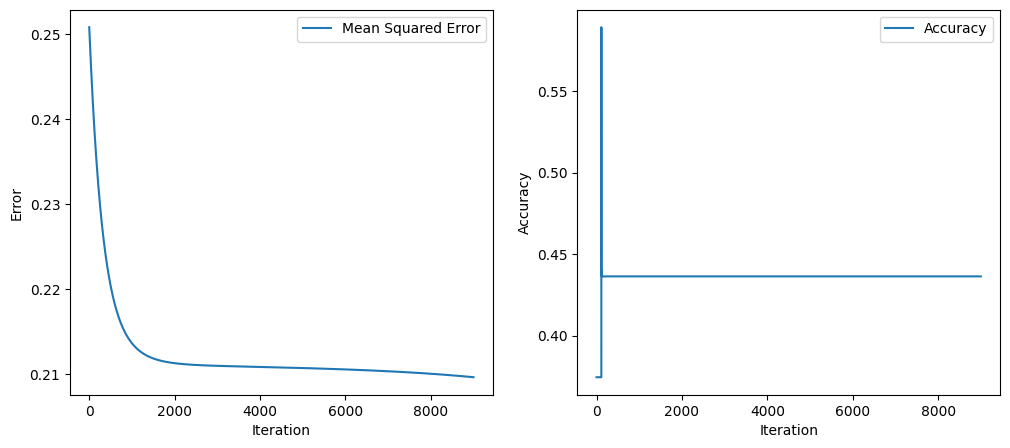

In [87]:
# Plot the mean squared error and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mse_history, label='Mean Squared Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy_history, label='Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


###Now we will calculate the accuracy of the model.



In [88]:
# Test the model
X_test = X_test.T  # Convert to numpy array and transpose
Z1_test = np.dot(W1, X_test) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(W2, A1_test) + b2
A2_test = sigmoid(Z2_test)

predictions_test = np.argmax(A2_test, axis=0)
y_test_encoded = one_hot_encode(y_test)
test_acc = accuracy(np.argmax(y_test_encoded, axis=1), predictions_test)
print(f"Test Accuracy: {test_acc}")


Test Accuracy: 0.463768115942029


#**Well Done :)**